In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [9]:
# Read music files and convert into spectograms using librosa

cmap = plt.get_cmap('magma')

plt.figure(figsize=(10,10))
genres2 = ' classical hiphop'.split()
for music in genres2:
    pathlib.Path(f'{music}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'genres2/{music}'):
        song = f'genres2/{music}/{filename}'
        y, sr = librosa.load(song, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'{music}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [10]:
header = 'filename chroma_stft  spectral_centroid '
header = header.split()


In [11]:
file = open('data3.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = ' classical hiphop '.split()
for g in genres:
    for filename in os.listdir(f'genres2/{g}'):
        songname = f'genres2/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr)
        tempogram([y, sr, onset_envelope, …])
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)}'    

        file = open('data3.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
#manually inputed label

In [15]:
data = pd.read_csv('data3.csv')
data.head()

,filename,chroma_stft,spectral_centroid,label
0,classical.00000.au,0.252391,1505.299012,classical
1,classical.00001.au,0.215064,1360.408354,classical
2,classical.00002.au,0.277865,1490.034810,classical
3,classical.00003.au,0.234236,1526.647067,classical
4,classical.00004.au,0.223171,1705.704611,classical


In [19]:
 # Assign X (data) and y (target)
X = data.drop("label", axis=1)
y = data["label"]
print(X.shape, y.shape)

(200, 2) (200,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
#Test Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [22]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [23]:
 classifier.fit(X_train, y_train)

LogisticRegression()

In [24]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [25]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8933333333333333
Testing Data Score: 0.94


In [26]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['classical' 'classical' 'classical' 'classical' 'hiphop' 'hiphop'
 'classical' 'classical' 'classical' 'hiphop']
First 10 Actual labels: ['classical', 'classical', 'classical', 'hiphop', 'hiphop', 'hiphop', 'classical', 'classical', 'classical', 'hiphop']


In [27]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,classical,classical
1,classical,classical
2,classical,classical
3,classical,hiphop
4,hiphop,hiphop
5,hiphop,hiphop
6,classical,classical
7,classical,classical
8,classical,classical
9,hiphop,hiphop


In [31]:
#KNN test
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [32]:
 # Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.980
k: 3, Train/Test Score: 0.973/0.980
k: 5, Train/Test Score: 0.980/0.980
k: 7, Train/Test Score: 0.980/0.980
k: 9, Train/Test Score: 0.980/0.980
k: 11, Train/Test Score: 0.980/0.980
k: 13, Train/Test Score: 0.980/0.980
k: 15, Train/Test Score: 0.980/0.980
k: 17, Train/Test Score: 0.980/0.980
k: 19, Train/Test Score: 0.980/0.980


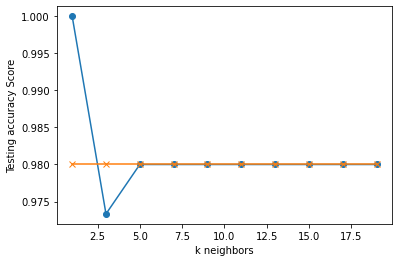

In [33]:
 # Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.980


In [35]:
 # Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(gamma='auto', kernel='linear')

In [37]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.960


In [40]:
#  # Calculate classification report
# from sklearn.metrics import classification_report
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions,
#                             label=label))

NameError: name 'label' is not defined

In [ ]:
#testing same classification models on a more complicated  dataset